# 1. Import and Install Dependencies

In [53]:
import cv2
import mediapipe as mp
import numpy as np

# 2. OpenCV Feed

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    cv2.imshow('Selfie Seg', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 3. Apply Selfie Segmentation

In [35]:
mp_selfie = mp.solutions.selfie_segmentation

In [36]:
cap = cv2.VideoCapture(0)
# Create with statement for model 
with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Apply segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True

        cv2.imshow('Selfie Seg', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [37]:
res.segmentation_mask

array([[1.8969639e-31, 1.7072675e-31, 9.4848194e-32, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0611238e-24, 9.5501138e-25, 5.3056191e-25, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.9475658e-24, 2.6528091e-24, 1.4737829e-24, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.2027232e-18, 6.4824507e-18, 3.6013616e-18, ..., 7.9778254e-01,
        7.8173912e-01, 7.7772826e-01],
       [3.0251438e-17, 2.7226293e-17, 1.5125719e-17, ..., 8.1438458e-01,
        8.0419493e-01, 8.0164754e-01],
       [4.3216339e-17, 3.8894704e-17, 2.1608169e-17, ..., 8.2372320e-01,
        8.1682640e-01, 8.1510216e-01]], dtype=float32)

# 4. Process Results

In [38]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

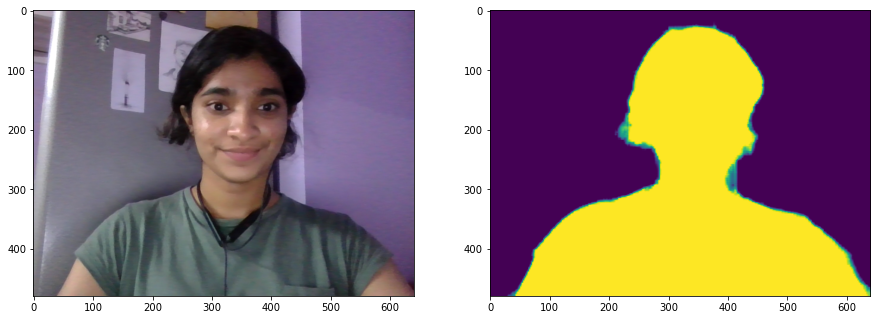

In [39]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [40]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

In [41]:
np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [42]:
segmented_image = np.where(mask, frame, background)

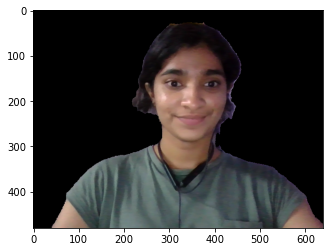

In [43]:
plt.imshow(segmented_image)

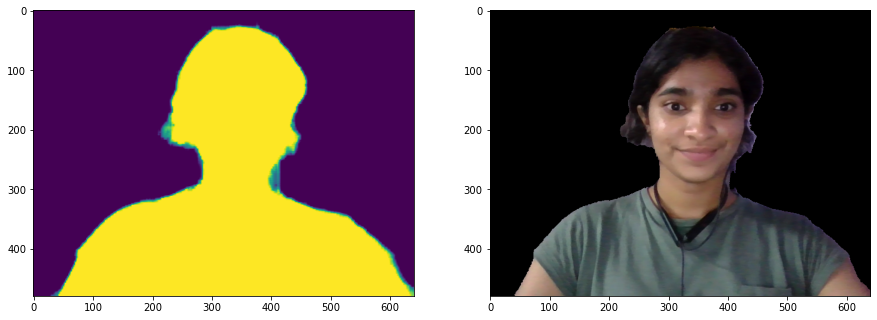

In [44]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [45]:
segmented_image = np.where(mask, frame, cv2.blur(frame, (40,40)))

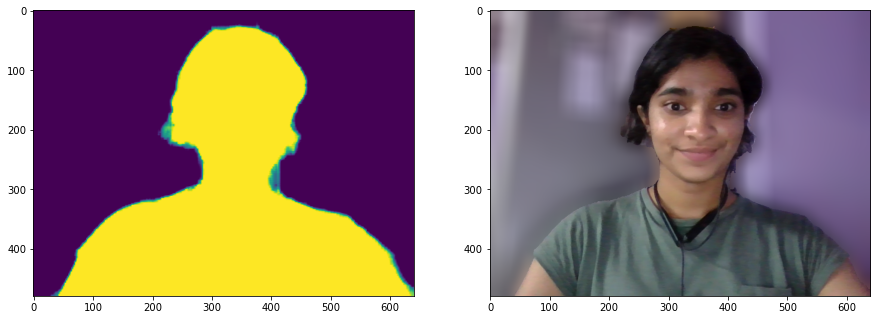

In [46]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

# 5. Gradio App

In [47]:
import gradio as gr

In [48]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [49]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")

In [50]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

In [55]:
webapp.launch()

Running on local URL:  http://127.0.0.1:7866/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x196b23ed0d0>,
 'http://127.0.0.1:7866/',
 None)